### Zadanie 1

In [2]:
import numpy as np
def range_statistic(data1, data2,f):
    m=len(data1)
    n=len(data2)
    N=n+m
    Z=np.hstack((data1,data2))
    Z_sorted=Z
    Z_sorted=np.sort(Z_sorted)
    result=0
    for i in range(m):
        r_i=np.where(Z_sorted==Z[i])[0][0]+1
        val=(r_i-0.5)/N
        result+=f(val)
    result*=1/m
    result2=0
    for i in range(m,N):
        r_i=np.where(Z_sorted==Z[i])[0][0]+1
        val=(r_i-0.5)/N
        result2+=f(val)
    result-=1/n*result2
    return result*np.sqrt((m*n)/N)

def fi_1(x):
    return np.sqrt(3)*(2*x-1)

def fi_2(x):
    return np.sqrt(48)*(0.25-np.abs(x-0.5))


def empiric(x,data):
    return (sum(element<x for element in data))/len(data)
    

def KS(data1,data2):
    m=len(data1)
    n=len(data2)
    N=n+m
    Z=np.hstack((data1,data2))
    max_diff=0
    for i in Z:
            r=np.abs(empiric(i,data1)-empiric(i,data2))
            if(r>max_diff):
                max_diff=r
                
    return np.sqrt(m*n/N)*max_diff
        

    

In [8]:
m=n=20
N=10000
W=[]
AB=[]
L=[]
K_S=[]
alpha=0.05

np.random.seed(0)
for i in range(N):
    data1=np.random.normal(loc=0, scale=1, size=n)
    data2=np.random.normal(loc=0, scale=1, size=m)
    w=range_statistic(data1,data2,fi_1)
    ab=range_statistic(data1,data2,fi_2)
    ks=KS(data1,data2)
    w=w**2
    ab=ab**2
    l=w+ab
    
    W.append(w)
    AB.append(ab)
    L.append(l)
    K_S.append(ks)

desired_percentile=1-alpha

critical_values=[]
critical_values.append(np.quantile(W, desired_percentile))
critical_values.append(np.quantile(AB, desired_percentile))
critical_values.append(np.quantile(L, desired_percentile))
critical_values.append(np.quantile(K_S, desired_percentile))
print(critical_values)
    

[3.887999999999999, 3.8880000000000017, 5.882999999999998, 1.264911064067352]


In [ ]:
COS NAPISAC: Czy taki sposób generowania wartości krytycznych jest poprawny?
Odpowiedź uzasadnij. !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!




Możemy sprawdzić, że w przypadku rozkładu Kołmogorowa-Smirnowa dla dwóch próbek, wartość krytyczna opisana jest wzorem $c(\alpha)=\sqrt{-\log(\frac{\alpha}{2})\frac{1}{2}}$, gdzie $c(\alpha)=1.34$ dla  $\alpha=0.05$. W przypadku testu Test Wilcoxona i Test Ansari-Bradley’a mamy asymptotyczny rozkład ch-kwadrat z 1 stopniem swobody, 'test Lepage’a to chi-kwadrat z 2 stopnaimi swobody.

In [11]:
print(np.sqrt(-np.log(alpha/2)*0.5))

1.3581015157406195


### Zadanie 2

In [7]:
import scipy.stats as stats
from scipy.stats import cauchy
import matplotlib.pyplot as plt
n=m=20
N=10000
sc=[]
mi_0=0
sigma_0=1
mi_1=[0.2,0.4,0.6,0.8,1,1.2,1.4]
mi_2=[0,0.5,1,1.5,2.0,2.5,3]
pp=['(i)','(ii)', '(iii)', '(iv)', '(v)','(vi)', '(vii)']
distr=[np.random.normal,np.random.logistic,cauchy.rvs]
desired_percentile=1-alpha
def task2(f,mi):
    global sc
    sc=[]
    W=AB=L=K_S=[]
    for k in range(len(pp)):
        score=[0,0,0,0]
        for i in range(N):
            data1=f(loc=mi_0, scale=sigma_0, size=n)
            data2=f(loc=mi[k], scale=sigma_0, size=m)
            w=range_statistic(data1,data2,fi_1)
            ab=range_statistic(data1,data2,fi_2)
            ks=KS(data1,data2)
            w=w**2
            ab=ab**2
            l=w+ab
            results=[w,ab,l,ks]
            for j in range(4):
                if (results[j]>critical_values[j]):
                    score[j]+=1
        score=[i/N for i in score]
        sc.append(score)
        print(pp[k],score)
    
            
def wykres(lista_list):
    tab=['Test Wilcoxona', 'Test Ansari-Bradley’a', 'test Lepage’a', 'test Kolmogorowa-Smirnowa']
    for kolumna in range(len(lista_list[0])):
        plt.scatter(range(len(lista_list)+1)[1:], [wiersz[kolumna] for wiersz in lista_list], label=tab[kolumna])
    plt.legend()
    plt.xlabel('Podpunkty')
    plt.ylabel('Wartość funkcji mocy')
    plt.show()
        

task2(np.random.normal,mi_1)

(i) [0.0978, 0.0447, 0.0834, 0.0623]
(ii) [0.2348, 0.0363, 0.1755, 0.1492]
(iii) [0.4329, 0.0369, 0.3454, 0.2923]
(iv) [0.6651, 0.0275, 0.5625, 0.5011]
(v) [0.85, 0.021, 0.7667, 0.7046]
(vi) [0.9511, 0.013, 0.9038, 0.8545]
(vii) [0.9885, 0.0077, 0.9732, 0.9502]


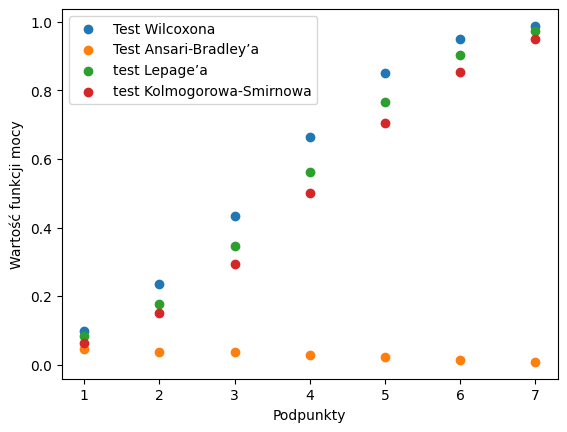

In [8]:
wykres(sc)

In [9]:
task2(np.random.logistic,mi_1)

(i) [0.0673, 0.0451, 0.0615, 0.0417]
(ii) [0.1147, 0.0452, 0.0987, 0.0746]
(iii) [0.1887, 0.0471, 0.1533, 0.1254]
(iv) [0.2961, 0.037, 0.2305, 0.2082]
(v) [0.4231, 0.0416, 0.339, 0.3075]
(vi) [0.5613, 0.0347, 0.4585, 0.4264]
(vii) [0.6911, 0.0318, 0.5875, 0.5539]


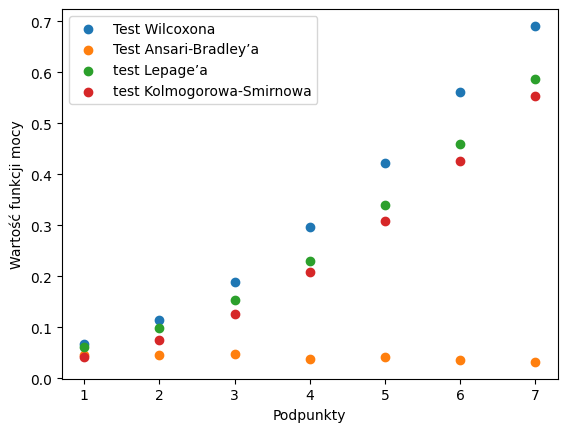

In [10]:
wykres(sc)

In [11]:
task2(cauchy.rvs,mi_2)

(i) [0.0501, 0.051, 0.0503, 0.0332]
(ii) [0.135, 0.0524, 0.1179, 0.1154]
(iii) [0.3566, 0.0675, 0.3108, 0.3679]
(iv) [0.623, 0.0842, 0.5659, 0.679]
(v) [0.8007, 0.0967, 0.7546, 0.8662]
(vi) [0.8991, 0.0984, 0.8683, 0.9497]
(vii) [0.9511, 0.099, 0.9332, 0.984]


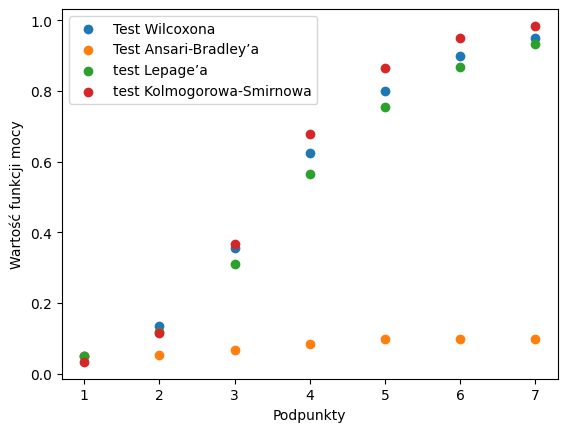

In [12]:
wykres(sc)

Moc testu to prawdopodobieństwo uniknięcia błędu drugiego rodzaju – przyjęcia hipotezy zerowej, gdy w rzeczywistości jest ona fałszywa. W każdym z rozważanych przez nas przykładów hipoteza zerowa nie zachodzi, bo rozważane rozkłady są różne w obrębie każdej z par. Wyliczając funkcję mocy, sprawdzam jaka część wartości statystyk obliczonych w obrębie każdego z testów przekracza wartość krytyczną (policzoną w zadaniu 2) dla tego testu. W naszym przypadku, przy ustalonej liczności próbki i poziomie istotności, pozwoli nam to na przybliżenie prawdopodobieństwa przyjęcia hipotezy zerowej. W tym zadaniu rozważane przez nas pary rozkładów wraz z rosnącymi podpuktami (i)-(vii) coraz bardziej oddalają się od siebie ze względu na średnią przy stałej wariancji. Możemy zaobserwować, że bez względu na rozważany rozkład, bardzo czułym testem ze względu na średnią jest test Wilcoxona. Test Lepege'a, który korzysta z wartości obliczonych w teście W również jest czuły na ten parametr. W przypadku testu Kolmogorowa-Smirnowa, funkcja mocy rośnie wraz z kolejnymi podpunktami, czyli wykrywa coraz większe różnice w obrębie rozkładów, jednak jej tempo wzrostu zależy od rozkładu - w przypadku Cauchy'ego radzi sobie lepiej niż W i L, w przypadku pozostałych rozkładów - gorzej. Natomiast test Ansari-Bradley'a nie jest w ogóle czuły na zmiany średniej - jego moc bardzo nieznacznie rośnie, ale nigdy nie przekracza $0.1$, więc zdecydowanie jest to test niewrażliwy na zmienę wartości średniej rozkładu. Dla rozkładu Cauchy'ego (c) i podpunktu (i), hipoteza zerowa zachodzi, więc nie możemy policzyć mocy testu.

### Zadanie 3

In [13]:
sc=[] 
n=m=20
N=10000
mi_0=0
sigma_0=1
sigma_1=[1, 1.5, 2, 2.5, 3, 3.5, 4]
sigma_2=np.arange(8)[1:]
pp=['(i)','(ii)', '(iii)', '(iv)', '(v)','(vi)', '(vii)']
distr=[np.random.normal,np.random.logistic,cauchy.rvs]
desired_percentile=1-alpha
def task3(f,sigma):
    global sc
    sc=[]
    W=AB=L=K_S=[]
    for k in range(len(pp)):
        score=[0,0,0,0]
        for i in range(N):
            data1=f(loc=mi_0, scale=sigma_0, size=n)
            data2=f(loc=mi_0, scale=sigma[k], size=m)
            w=range_statistic(data1,data2,fi_1)
            ab=range_statistic(data1,data2,fi_2)
            ks=KS(data1,data2)
            w=w**2
            ab=ab**2
            l=w+ab
            results=[w,ab,l,ks]
            for j in range(4):
                if (results[j]>critical_values[j]):
                    score[j]+=1
        score=[i/N for i in score]
        sc.append(score)
        print(pp[k],score)
    
def wykres(lista_list):
    tab=['Test Wilcoxona', 'Test Ansari-Bradley’a', 'test Lepage’a', 'test Kolmogorowa-Smirnowa']
    for kolumna in range(len(lista_list[0])):
        plt.scatter(range(len(lista_list)+1)[1:], [wiersz[kolumna] for wiersz in lista_list], label=tab[kolumna])
    plt.legend()
    plt.xlabel('Podpunkty')
    plt.ylabel('Wartość funkcji mocy')
    plt.show()
        
      

task3(np.random.normal,sigma_1)

(i) [0.0504, 0.0507, 0.055, 0.0327]
(ii) [0.0509, 0.2497, 0.2069, 0.0551]
(iii) [0.0614, 0.5749, 0.5111, 0.1191]
(iv) [0.0627, 0.7918, 0.7382, 0.1944]
(v) [0.0697, 0.9009, 0.8687, 0.2879]
(vi) [0.0754, 0.9558, 0.9408, 0.3866]
(vii) [0.0777, 0.9729, 0.9637, 0.4652]


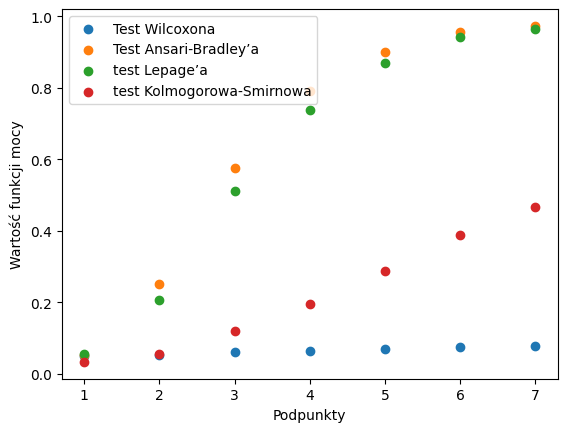

In [14]:
wykres(sc)



In [15]:
task3(np.random.logistic,sigma_1)

(i) [0.051, 0.0481, 0.0505, 0.0328]
(ii) [0.0511, 0.2205, 0.1826, 0.0541]
(iii) [0.0604, 0.5295, 0.4676, 0.1056]
(iv) [0.0656, 0.743, 0.682, 0.1772]
(v) [0.0658, 0.8738, 0.8322, 0.2542]
(vi) [0.0695, 0.9363, 0.9148, 0.3375]
(vii) [0.0767, 0.9664, 0.9537, 0.408]


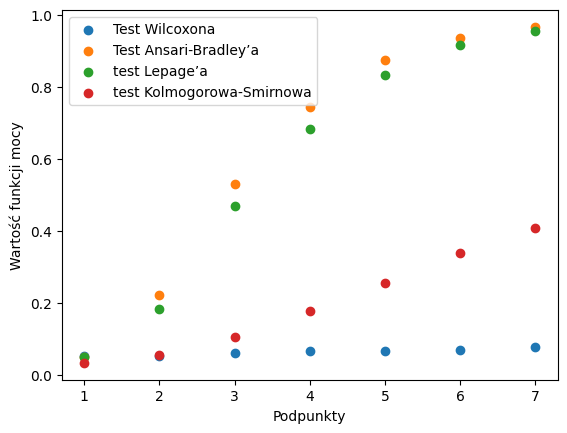

In [16]:
wykres(sc)

In [17]:
task3(cauchy.rvs,sigma_2)

(i) [0.0469, 0.0477, 0.0499, 0.0301]
(ii) [0.0506, 0.2851, 0.2376, 0.0743]
(iii) [0.0601, 0.5794, 0.5075, 0.1491]
(iv) [0.0639, 0.7676, 0.7094, 0.2194]
(v) [0.0667, 0.8619, 0.8214, 0.292]
(vi) [0.0705, 0.9329, 0.9051, 0.3699]
(vii) [0.0761, 0.95, 0.9337, 0.4297]


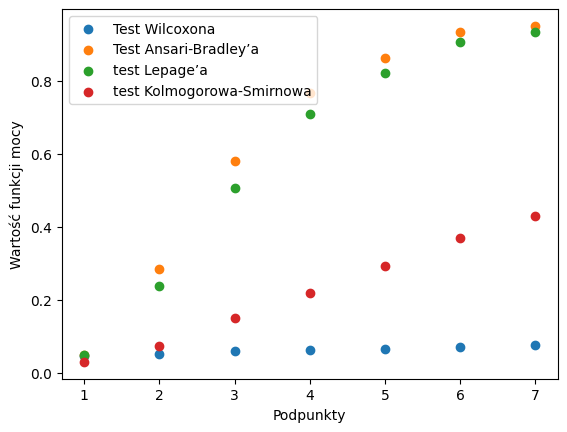

In [18]:
wykres(sc)

Teraz rozważamy rozkłady, które w obrębie podpunktów (i)-(vii) coraz bardziej oddalają się od siebie ze względu na wariancję przy stałej średniej. Możemy zaobserować, że tym razem test Wilcoxona (który był tak czuły na zmiany średniej), nie jest czuły na zmiany wariancji. Wartość jego funckji mocy w każdym z przykładów nie przekracza $0.1$. Natomiast, również w przeciwieństwie do poprzedniego zadania, bardzo dobrze radzi sobie test Ansari-Bradley’a. Był on nieczuły na zmieny średniej, ale dobrze wykrywa różnice między rozkładami ze względu na wariancję. Moc testu Lepage’a, który korzysta z wartości wyliczonych w AB, również rośnie dość szybko. Natomiast moc testu Kołmogorowa-Smirnowa odbiega od mocy AB i L. Jej wartość przy analizie rozładów o coraz bardziej rozbieżnych wariancjach rośnie, ale tempo wzrostu jest zdecydowanie wolniejsze niż w przypadku AB i L, jednak zdecydowanie szybsze niż w przypadku W. Dla rozkładu Cauchy'ego (c) i podpunktu (i), hipoteza zerowa zachodzi, więc nie możemy policzyć mocy testu.

### Zadanie 4

In [19]:
import scipy.stats as stats
from scipy.stats import cauchy
n=m=20
N=10000
sc=[]
mi_0=0
sigma_0=1
mi_1=[0.2,0.4,0.6,0.8,1,1.2,1.4]
mi_2=[0,0.5,1,1.5,2.0,2.5,3]
sigma_1=[1, 1.5, 2, 2.5, 3, 3.5, 4]
sigma_2=np.arange(8)[1:]
pp=['(i)','(ii)', '(iii)', '(iv)', '(v)','(vi)', '(vii)']
distr=[np.random.normal,np.random.logistic,cauchy.rvs]
desired_percentile=1-alpha
def task4(f,mi,sigma):
    global sc
    sc=[]
    W=AB=L=K_S=[]
    for k in range(len(pp)):
        score=[0,0,0,0]
        for i in range(N):
            data1=f(loc=mi_0, scale=sigma_0, size=n)
            data2=f(loc=mi[k], scale=sigma[k], size=m)
            w=range_statistic(data1,data2,fi_1)
            ab=range_statistic(data1,data2,fi_2)
            ks=KS(data1,data2)
            w=w**2
            ab=ab**2
            l=w+ab
            results=[w,ab,l,ks]
            for j in range(4):
                if (results[j]>critical_values[j]):
                    score[j]+=1
        score=[i/N for i in score]
        sc.append(score)
        print(pp[k],score)
    
            
def wykres(lista_list):
    tab=['Test Wilcoxona', 'Test Ansari-Bradley’a', 'test Lepage’a', 'test Kolmogorowa-Smirnowa']
    for kolumna in range(len(lista_list[0])):
        plt.scatter(range(len(lista_list)+1)[1:], [wiersz[kolumna] for wiersz in lista_list], label=tab[kolumna])
    plt.legend()
    plt.xlabel('Podpunkty')
    plt.ylabel('Wartość funkcji mocy')
    plt.show()
        

task4(np.random.normal,mi_1,sigma_1)

(i) [0.0936, 0.0457, 0.0837, 0.0575]
(ii) [0.1646, 0.2287, 0.2949, 0.1425]
(iii) [0.2188, 0.5467, 0.6162, 0.2789]
(iv) [0.2585, 0.7582, 0.8287, 0.424]
(v) [0.2888, 0.8666, 0.9198, 0.552]
(vi) [0.3127, 0.9155, 0.9638, 0.6446]
(vii) [0.3276, 0.946, 0.9848, 0.7257]


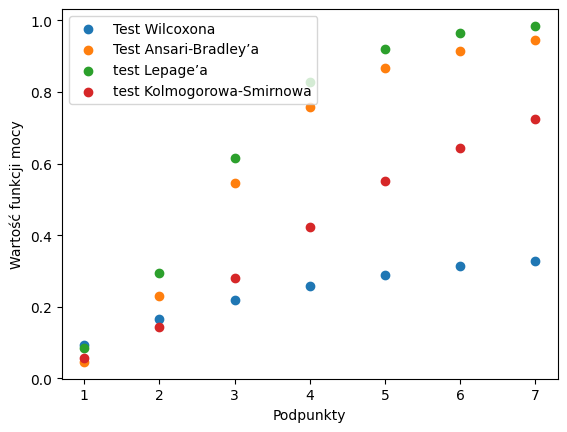

In [20]:
wykres(sc)

In [21]:
task4(np.random.logistic,mi_1,sigma_1)

(i) [0.0648, 0.0486, 0.0626, 0.0414]
(ii) [0.0879, 0.2231, 0.217, 0.0816]
(iii) [0.1155, 0.5162, 0.4961, 0.1596]
(iv) [0.1322, 0.7374, 0.7274, 0.2623]
(v) [0.1504, 0.8581, 0.8611, 0.3745]
(vi) [0.1594, 0.9192, 0.9254, 0.4469]
(vii) [0.1762, 0.9535, 0.9636, 0.5293]


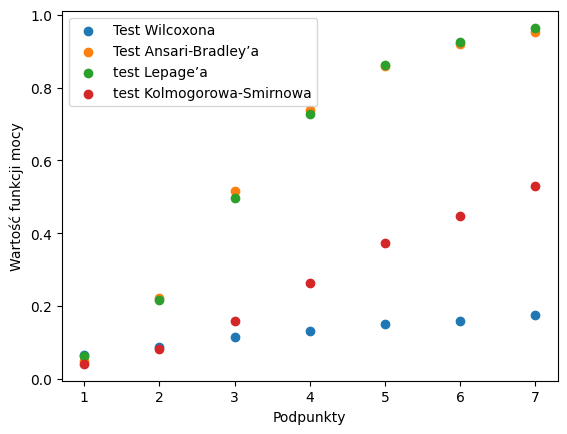

In [22]:
wykres(sc)

In [23]:
task4(cauchy.rvs,mi_2,sigma_2)

(i) [0.048, 0.0468, 0.0498, 0.0299]
(ii) [0.0938, 0.2668, 0.2606, 0.1142]
(iii) [0.1443, 0.5645, 0.5712, 0.263]
(iv) [0.1851, 0.7258, 0.7604, 0.3912]
(v) [0.2171, 0.8323, 0.8677, 0.5005]
(vi) [0.2425, 0.8742, 0.9171, 0.5868]
(vii) [0.2594, 0.9046, 0.953, 0.6519]


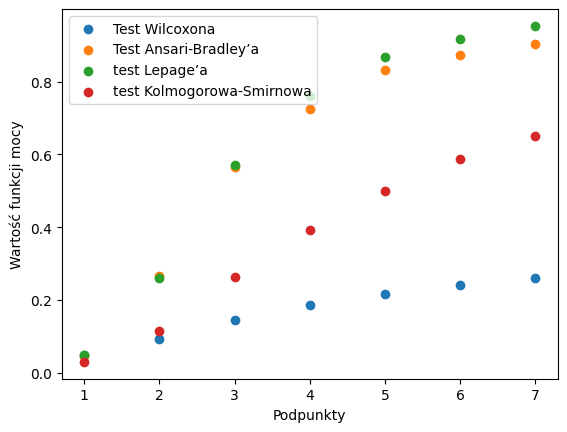

In [24]:
wykres(sc)

Teraz rozważamy rozkłady, które w obrębie podpunktów (i)-(vii) coraz barzdiej oddalają się od siebie ze względu na wariancję i na średnią jednocześnie. Najlepiej radzi sobie test Lepage'a, który uzwględnia wartości wyliczone dla testu Wilcoxona (czułego na średnią) i testu Ansari-Bradleya (czułego na wariancję). Wartość mocy dla wszystkcih testów rośnie wraz z rozbieżnością rozkładów. Najszybciej robi to L, potem AB, następnie KS i najwolniej W. Dla rozkładu Cauchy'ego (c) i podpunktu (i), hipoteza zerowa zachodzi, więc nie możemy policzyć mocy testu.

### Zadanie 5

In [31]:
m=n=50
N=10000
W=[]
AB=[]
L=[]
K_S=[]
alpha=0.05

np.random.seed(0)
for i in range(N):
    data1=np.random.normal(loc=0, scale=1, size=n)
    data2=np.random.normal(loc=0, scale=1, size=m)
    w=range_statistic(data1,data2,fi_1)
    ab=range_statistic(data1,data2,fi_2)
    ks=KS(data1,data2)
    w=w**2
    ab=ab**2
    l=w+ab
    
    W.append(w)
    AB.append(ab)
    L.append(l)
    K_S.append(ks)

desired_percentile=1-alpha

critical_values=[]
critical_values.append(np.quantile(W, desired_percentile))

critical_values.append(np.quantile(AB, desired_percentile))

critical_values.append(np.quantile(L, desired_percentile))

critical_values.append(np.quantile(K_S, desired_percentile))
print(critical_values)
    

[3.817152, 3.8171519999999988, 5.903594399999997, 1.3]


### Zadanie 6

In [32]:
task2(np.random.normal,mi_1)

(i) [0.171, 0.0501, 0.1362, 0.1256]
(ii) [0.4883, 0.0427, 0.3942, 0.3775]
(iii) [0.8368, 0.0414, 0.7522, 0.7122]
(iv) [0.9731, 0.0324, 0.9452, 0.9235]
(v) [0.9985, 0.0231, 0.9947, 0.9909]
(vi) [0.9999, 0.0127, 0.9999, 0.9996]
(vii) [1.0, 0.0064, 1.0, 0.9999]


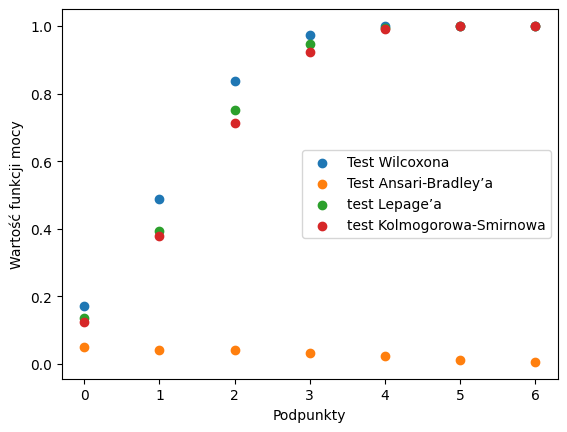

In [33]:
wykres(sc)

In [34]:
task2(np.random.logistic,mi_1)

(i) [0.0867, 0.0541, 0.0765, 0.0675]
(ii) [0.2106, 0.0512, 0.1665, 0.1643]
(iii) [0.4182, 0.0493, 0.3252, 0.3245]
(iv) [0.6321, 0.0476, 0.5298, 0.533]
(v) [0.8062, 0.0437, 0.7211, 0.719]
(vi) [0.9247, 0.0405, 0.8696, 0.8688]
(vii) [0.9785, 0.038, 0.9522, 0.9484]


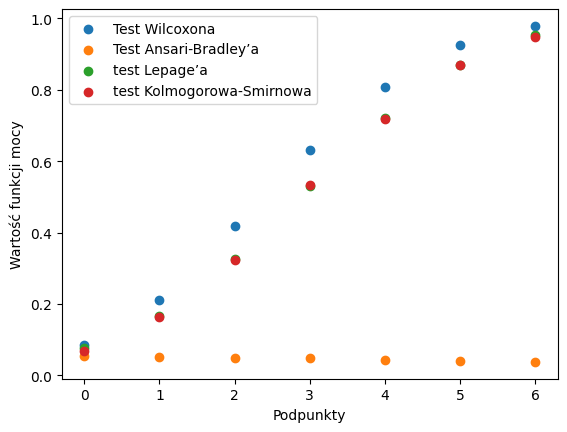

In [35]:
wykres(sc)

In [36]:
task2(cauchy.rvs,mi_2)

(i) [0.0503, 0.051, 0.0554, 0.0441]
(ii) [0.2758, 0.0575, 0.2229, 0.306]
(iii) [0.7302, 0.0784, 0.6554, 0.8229]
(iv) [0.9519, 0.0962, 0.9159, 0.9853]
(v) [0.9955, 0.1051, 0.9894, 0.9995]
(vi) [0.9995, 0.1162, 0.9987, 1.0]
(vii) [0.9999, 0.1168, 0.9999, 1.0]


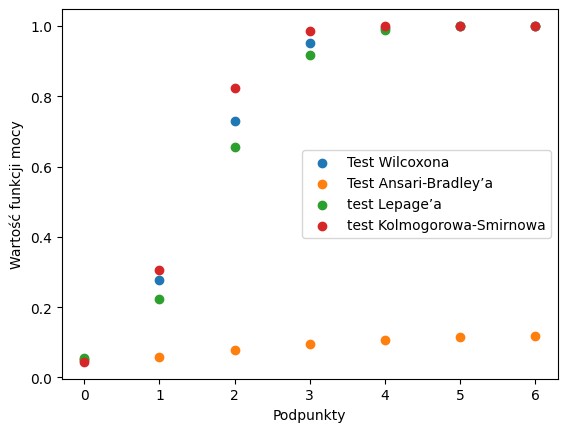

In [37]:
wykres(sc)

In [43]:
task3(np.random.normal,sigma_1)

(i) [0.049, 0.0556, 0.0543, 0.0433]
(ii) [0.0526, 0.5804, 0.4847, 0.1223]
(iii) [0.0563, 0.9492, 0.9104, 0.3643]
(iv) [0.0665, 0.9975, 0.9933, 0.6799]
(v) [0.0701, 0.9998, 0.9993, 0.8753]
(vi) [0.073, 1.0, 1.0, 0.9598]
(vii) [0.0796, 1.0, 1.0, 0.9882]


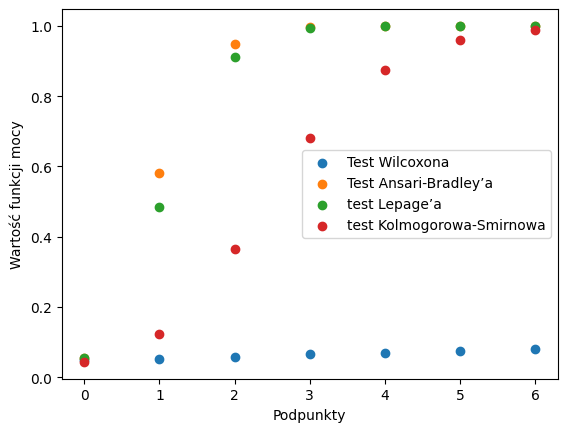

In [44]:
wykres(sc)

In [45]:
task3(np.random.logistic,sigma_1)

(i) [0.049, 0.0517, 0.0543, 0.0439]
(ii) [0.055, 0.5277, 0.4377, 0.1154]
(iii) [0.0563, 0.9181, 0.8722, 0.3339]
(iv) [0.0674, 0.993, 0.9849, 0.6084]
(v) [0.0718, 0.9992, 0.9987, 0.813]
(vi) [0.0717, 0.9999, 0.9998, 0.9203]
(vii) [0.0764, 1.0, 1.0, 0.9681]


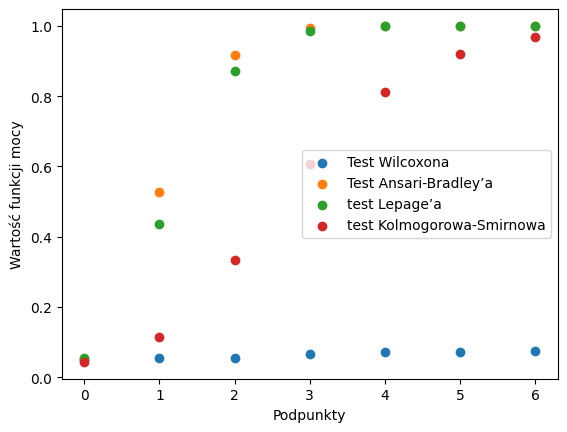

In [46]:
wykres(sc)

In [47]:
task3(cauchy.rvs,sigma_2)

(i) [0.0501, 0.0533, 0.051, 0.0434]
(ii) [0.0554, 0.6436, 0.5463, 0.1858]
(iii) [0.0592, 0.9546, 0.9201, 0.4659]
(iv) [0.0612, 0.9942, 0.9887, 0.7064]
(v) [0.0697, 0.9996, 0.999, 0.8468]
(vi) [0.0726, 1.0, 0.9998, 0.9258]
(vii) [0.0737, 1.0, 1.0, 0.9657]


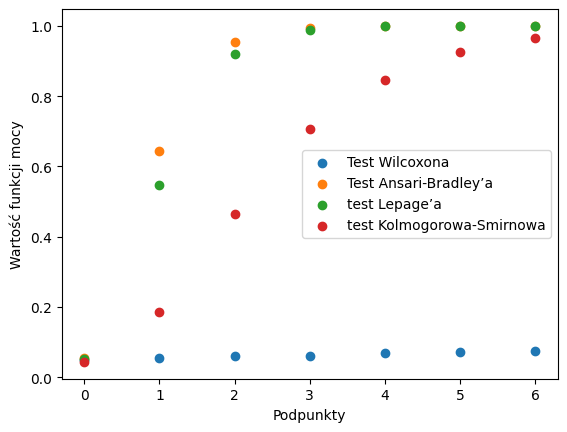

In [48]:
wykres(sc)

In [50]:
task4(np.random.normal,mi_1,sigma_1)

(i) [0.1657, 0.0498, 0.1296, 0.1248]
(ii) [0.3327, 0.5626, 0.6621, 0.3986]
(iii) [0.4579, 0.9377, 0.965, 0.75]
(iv) [0.5239, 0.9942, 0.9977, 0.9214]
(v) [0.5727, 0.999, 0.9999, 0.9773]
(vi) [0.6105, 0.9999, 1.0, 0.9949]
(vii) [0.6393, 1.0, 1.0, 0.9998]


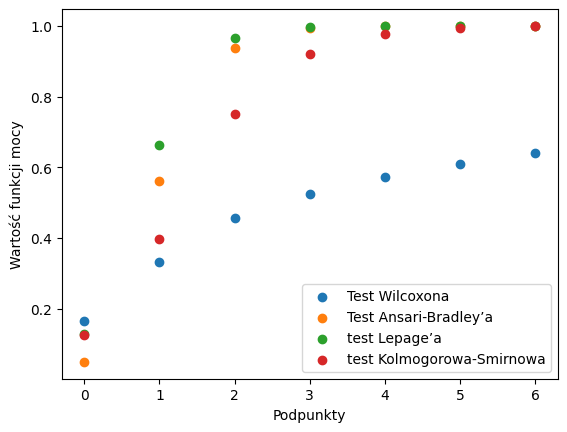

In [51]:
wykres(sc)

In [39]:
task4(np.random.logistic,mi_1,sigma_1)

(i) [0.0893, 0.0494, 0.0771, 0.0704]
(ii) [0.1486, 0.5261, 0.5042, 0.218]
(iii) [0.202, 0.9143, 0.9094, 0.4966]
(iv) [0.2421, 0.9915, 0.9918, 0.7588]
(v) [0.2798, 0.9985, 0.9985, 0.9025]
(vi) [0.2973, 1.0, 1.0, 0.9603]
(vii) [0.3201, 1.0, 1.0, 0.9875]


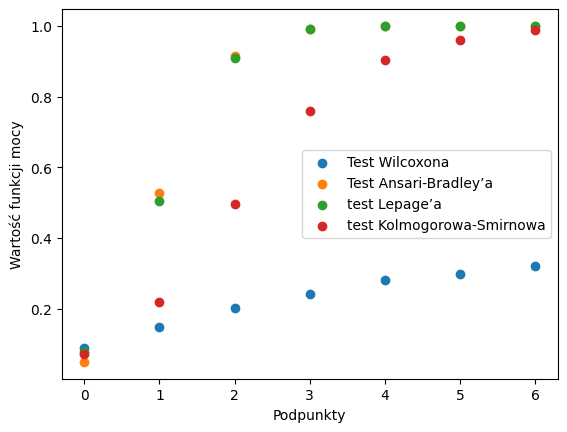

In [40]:
wykres(sc)

In [41]:
task4(cauchy.rvs,mi_2,sigma_2)

(i) [0.0515, 0.0558, 0.0524, 0.0431]
(ii) [0.1529, 0.6452, 0.6211, 0.3291]
(iii) [0.2801, 0.9417, 0.9479, 0.7044]
(iv) [0.3732, 0.9893, 0.9951, 0.8941]
(v) [0.4378, 0.9971, 0.9994, 0.9644]
(vi) [0.4779, 0.9987, 0.9999, 0.9857]
(vii) [0.5171, 0.9995, 1.0, 0.9929]


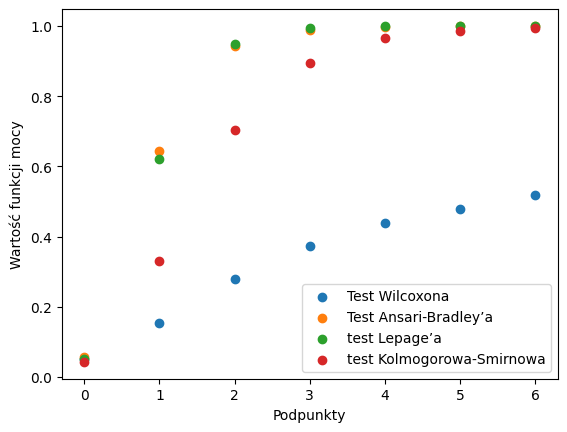

In [42]:
wykres(sc)

Przeprowadzając te same eksperymenty dla $n=50$ możemy zaobserwować, że generalnie tempo wzrostu mocy dla coraz bardziej rozbieżnych par rozkładów jest większe w przypadku analizy liczniejszych prób. Dla większych próbek efektywność ,,dobrych'' testów rośnie, jednak np. test Ansari-Bradley'a nadal nie jest w ogóle czuły na zmiany średniej, a test Wilcoxona na zmieny wariancji. Test Kołmogorowa-Smirnowa, który wcześniej nie był tak efektywny dla wykrywania różnic w wariancji rozkładów, teraz osiąga większą efektywność.